In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import math

%matplotlib inline
random.seed(123) # Works same every time we run

In [2]:
# Generate random data points (1-Dimensional)
x = np.arange(-1,1,0.1)
len(x)

20

In [3]:
# Construct a Linear Equation
m = 3
b = 1
randomness = [random.randint(-1,1) for x in range(len(x))]

In [6]:
# Sigmoid function with randomness
s_y = (1/(1+np.exp(-(m*x+b+randomness))))
# Sigmoid function without randomness
s_y_n = (1/(1+np.exp(-(m*x+b))))
s_y[s_y >= 0.7] = 1
s_y[s_y < 0.7] = 0
s_y

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1.])

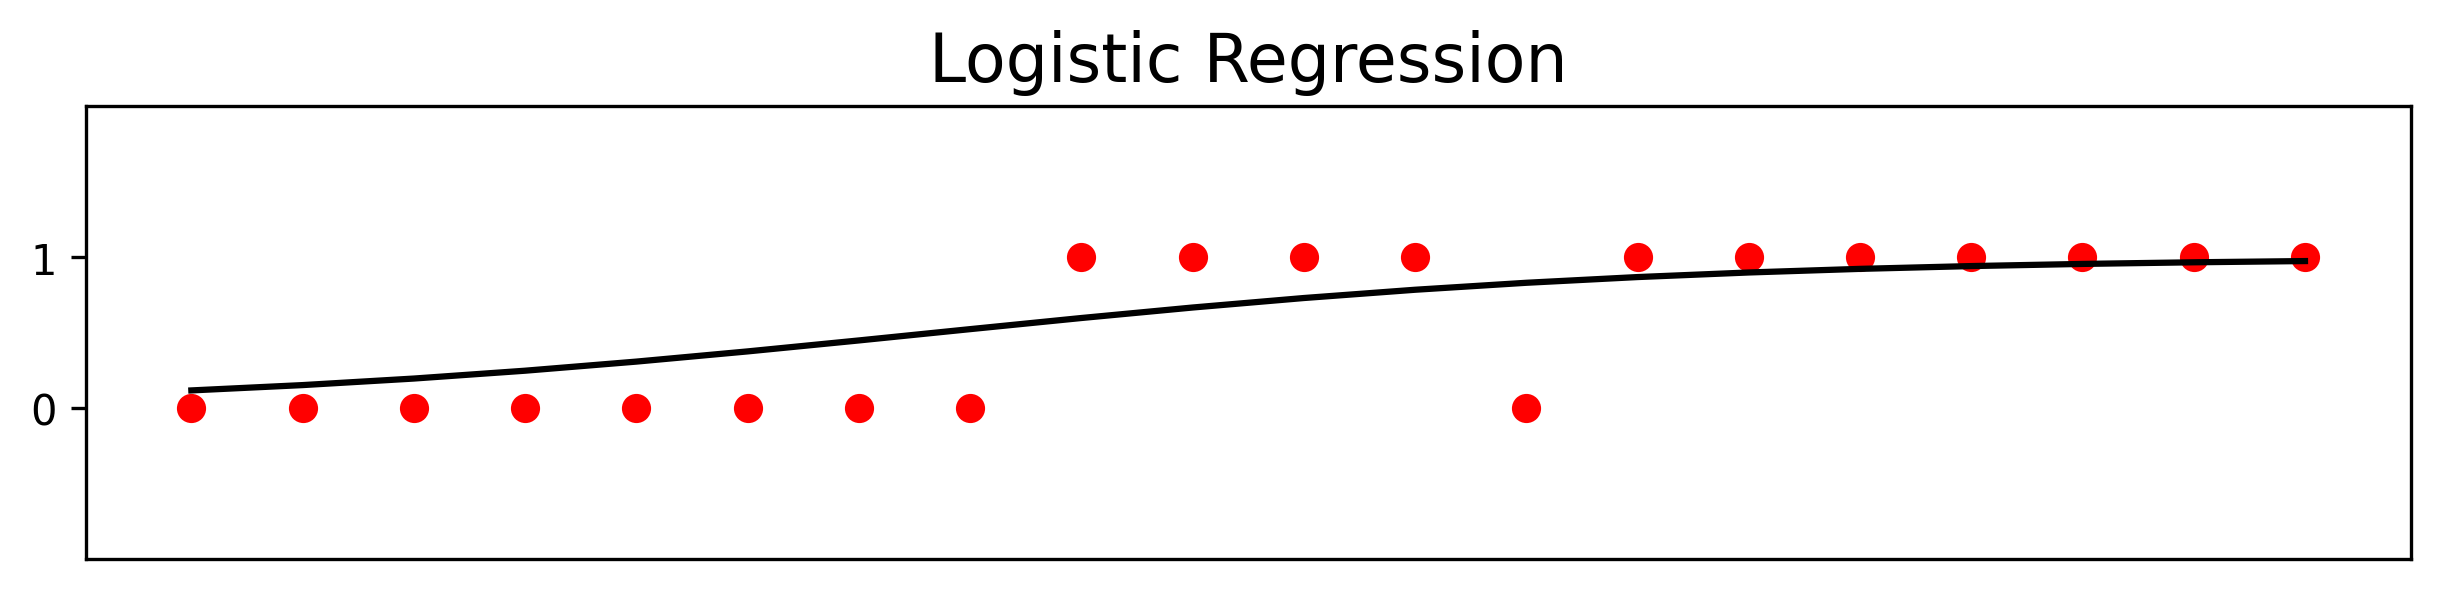

In [5]:
figure = plt.figure(1,(10,2),dpi=300)
plt.title("Logistic Regression",fontsize=16)
plt.ylim(-1,2)
plt.yticks([0,1])
plt.xticks([])
plt.scatter(x,s_y,color="red")
plt.plot(x,s_y_n,color="black")
# plt.savefig("Logistic Regression.png", format="png", dpi=300)
plt.show()

In [257]:
x_points = np.array([0,5,10,15])
y_points = np.array([2,50,-25,-0.001])
y_sigmoid = (1/(1+np.exp(-y_points)))
print(y_sigmoid)

[8.80797078e-01 1.00000000e+00 1.38879439e-11 4.99750000e-01]


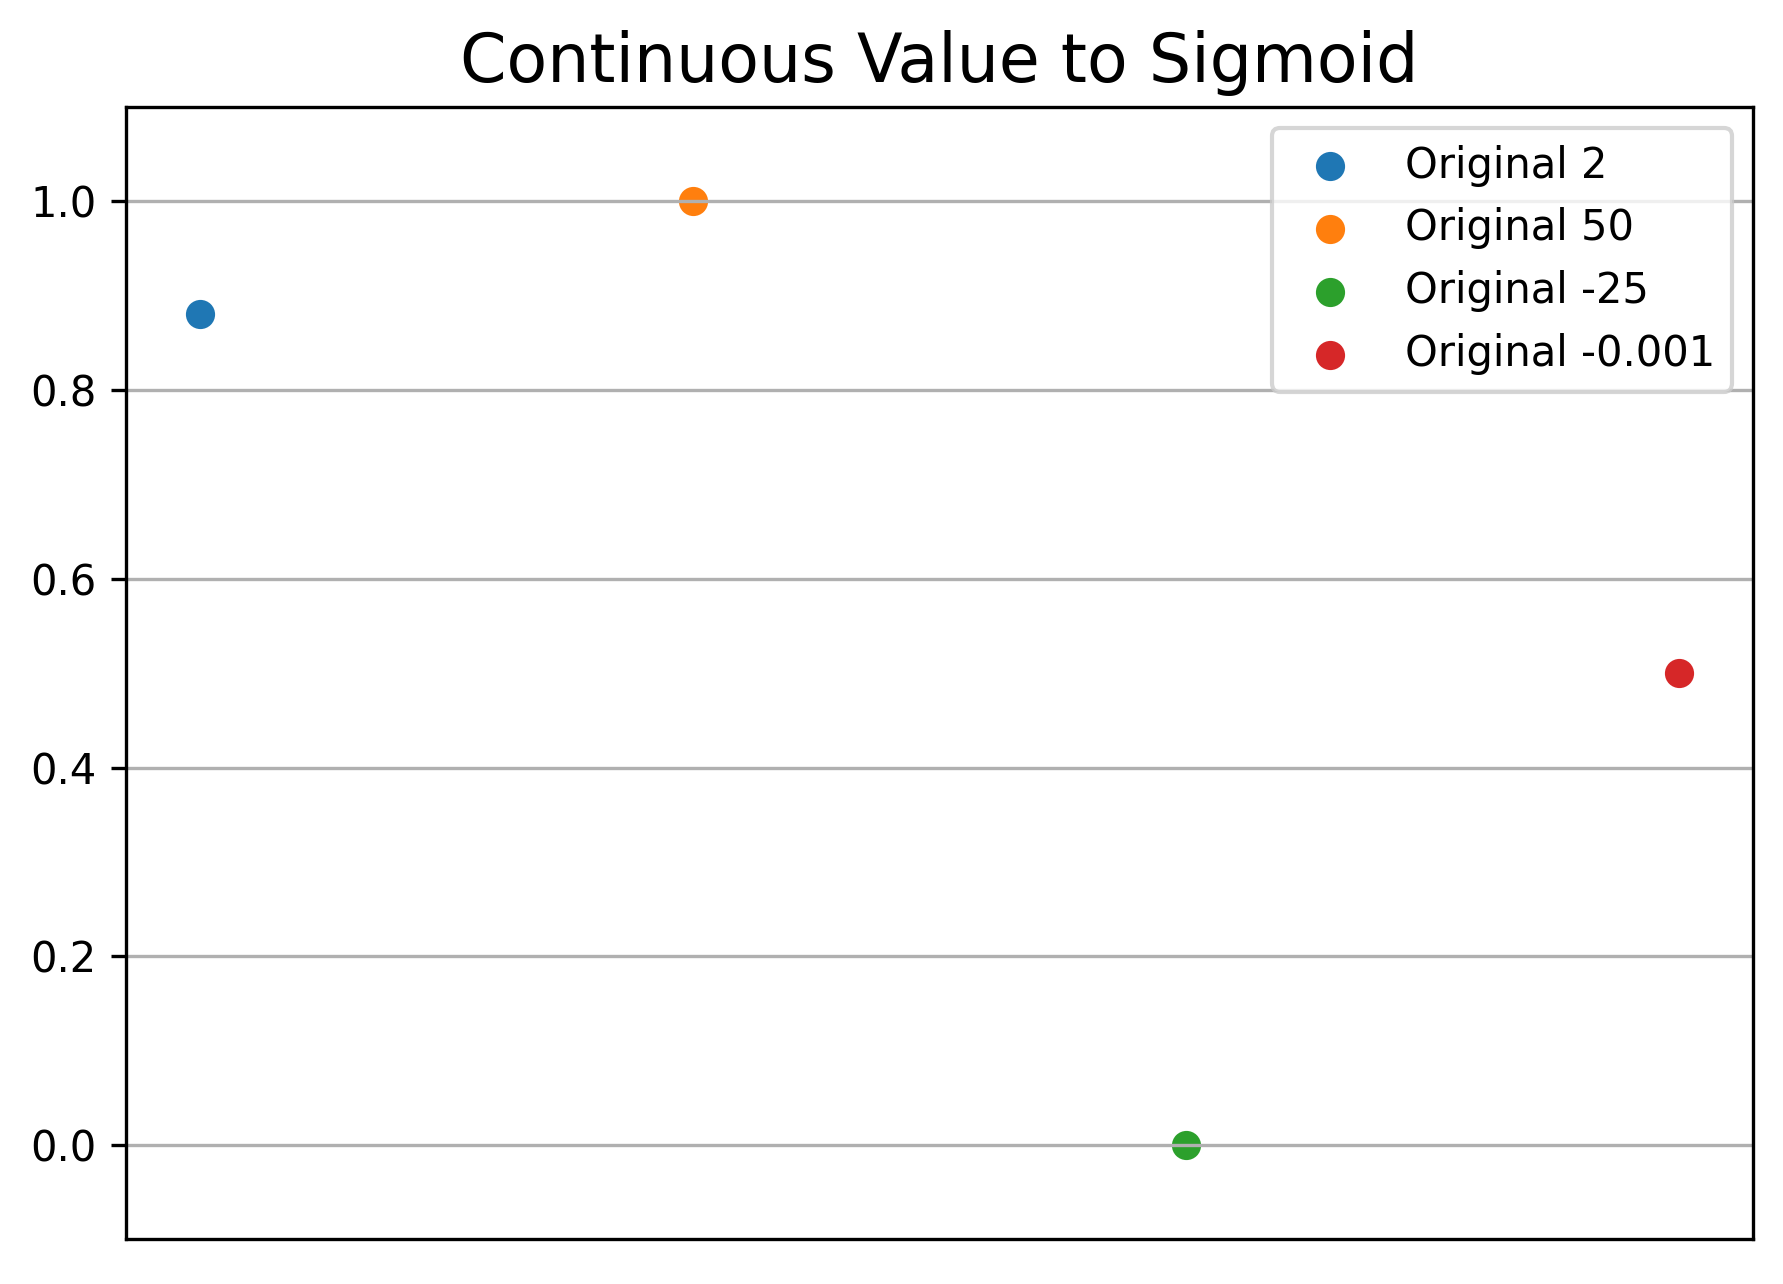

In [258]:
figure = plt.figure(1,(7,5),dpi=300)
plt.title("Continuous Value to Sigmoid",fontsize=16)
plt.ylim(-0.1,1.1)
plt.yticks()
plt.xticks([])
plt.scatter(x_points[0],y_sigmoid[0],label="Original 2")
plt.scatter(x_points[1],y_sigmoid[1],label="Original 50")
plt.scatter(x_points[2],y_sigmoid[2],label="Original -25")
plt.scatter(x_points[3],y_sigmoid[3],label="Original -0.001")
plt.grid(True)
plt.legend()
# plt.savefig("Continuous Value to Sigmoid.png", format="png", dpi=300)
plt.show()

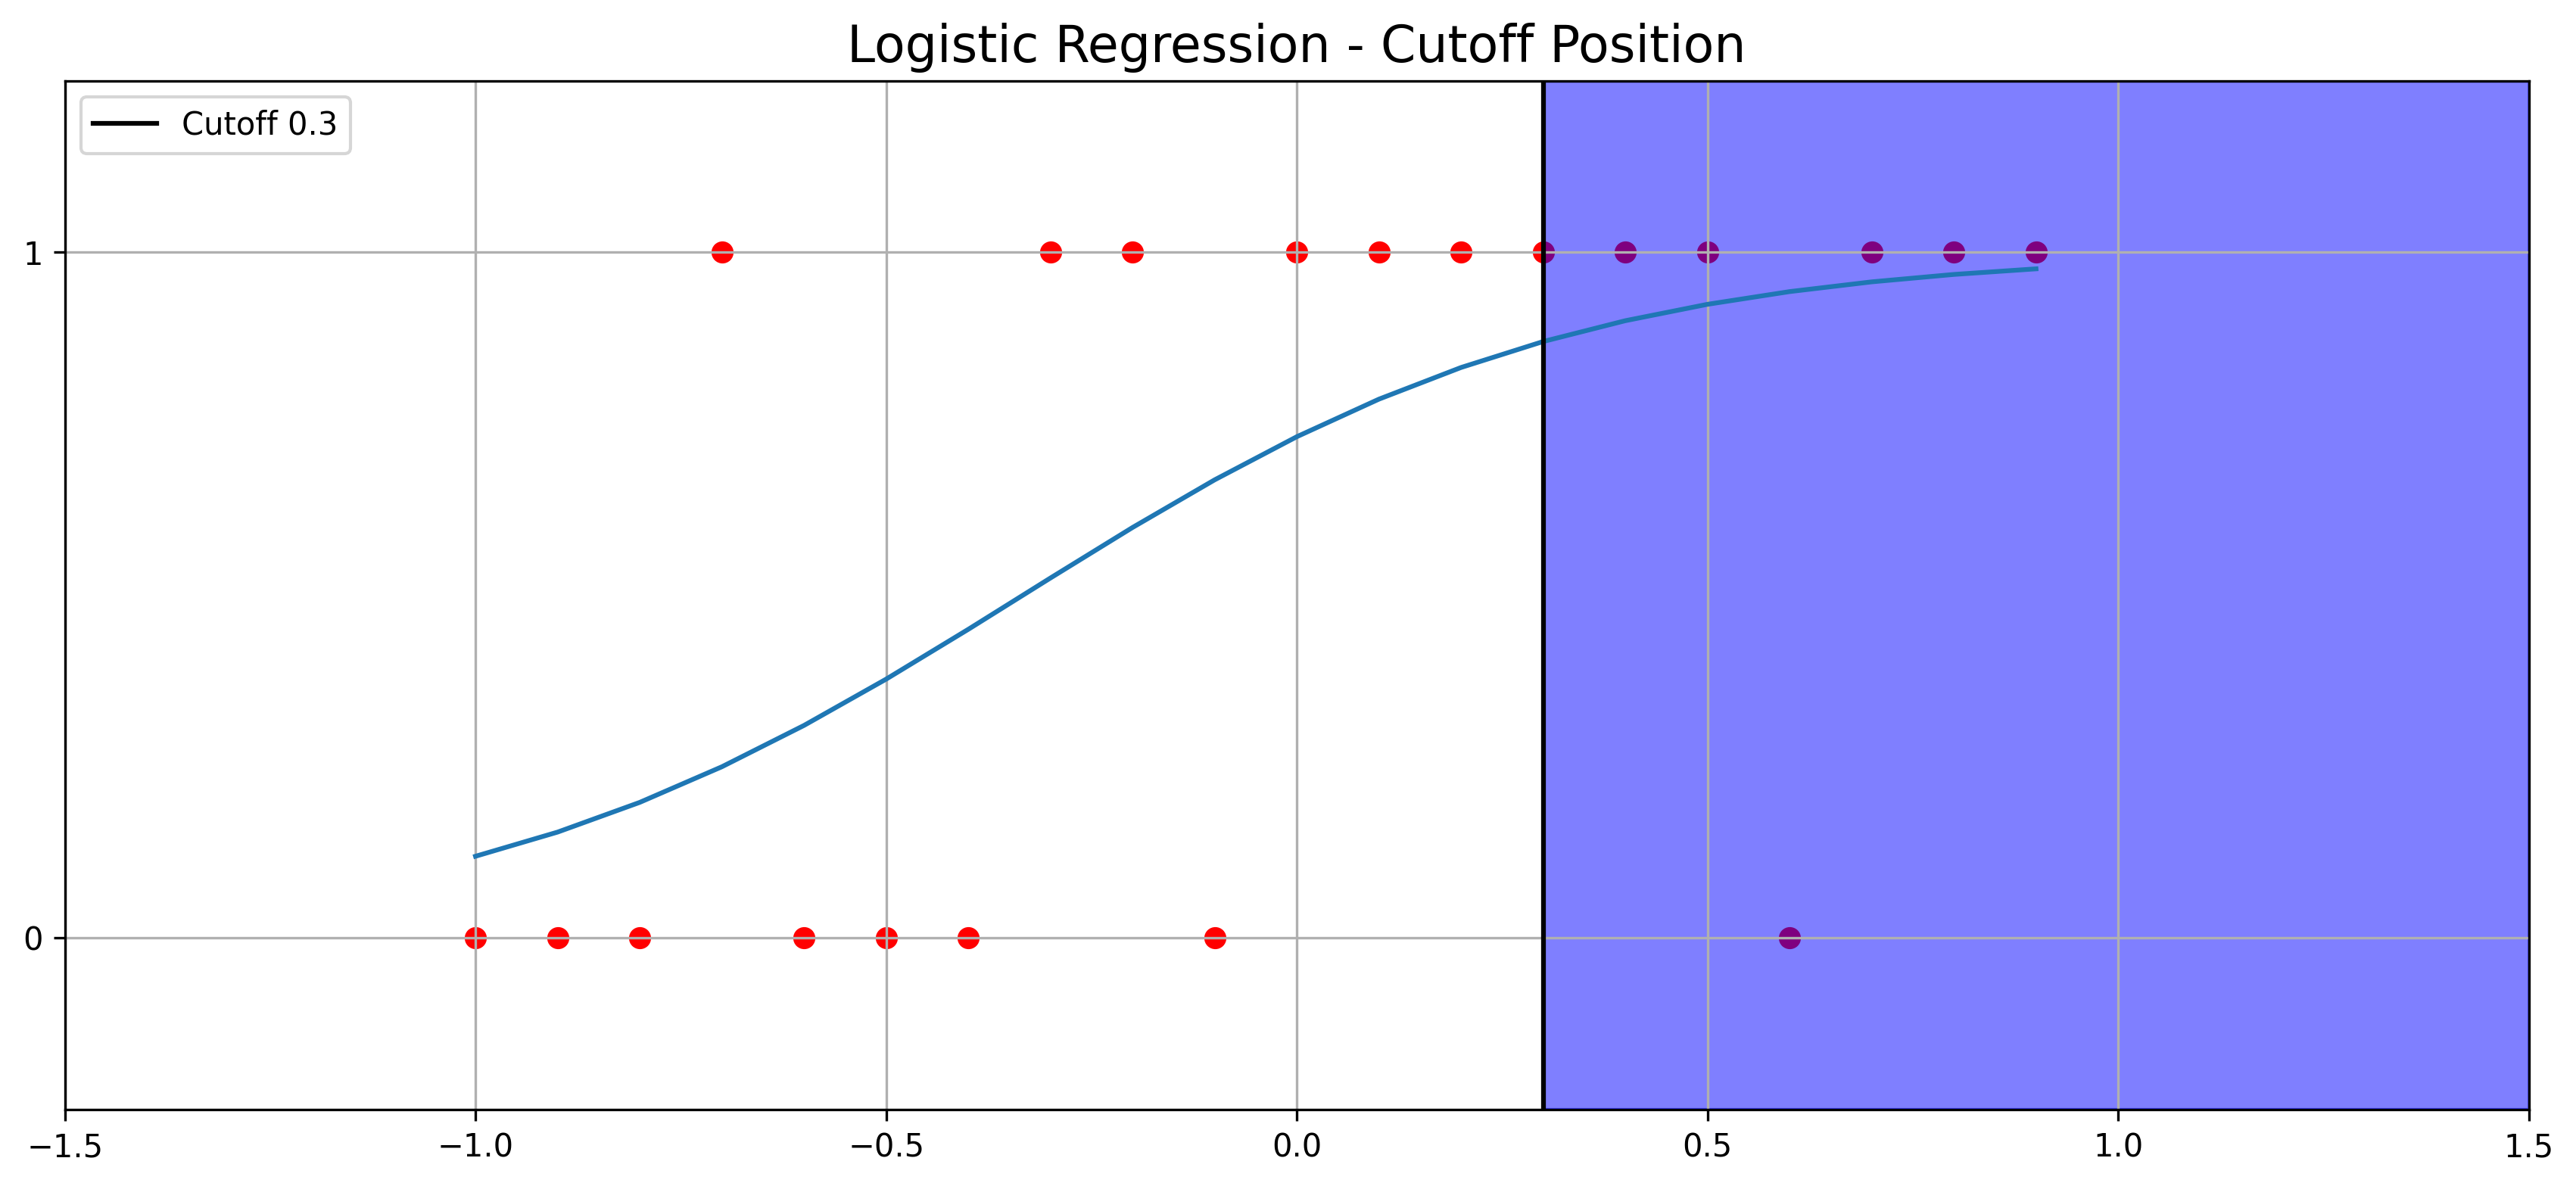

In [259]:
random.seed(123) # Works same every time we run
# Construct a Linear Equation
m = 3
b = 1
x = np.arange(-1,1,0.1)
randomness = [random.randint(-3,3) for x in range(len(x))]


# Sigmoid function with randomness
s_y = (1/(1+np.exp(-(m*x+b+randomness))))
# Sigmoid function without randomness
s_y_n = (1/(1+np.exp(-(m*x+b))))


s_y[s_y >= 0.7] = 1
s_y[s_y < 0.7] = 0


figure = plt.figure(1,(14,6),dpi=300)
plt.title("Logistic Regression - Cutoff Position",fontsize=16)
plt.ylim(-0.25,1.25)
plt.xlim(-1.5,1.5)
plt.yticks([0,1])
plt.xticks()
plt.scatter(x,s_y,color="red")
plt.plot(x,s_y_n)
plt.axvline(0.3,color="black",label="Cutoff 0.3")
plt.axvspan(0.3, 1.5, alpha=0.5, color='blue')
plt.grid(True)
plt.legend()
# plt.savefig("Logistic Regression Cutoff_Position_1.png", format="png", dpi=300)
plt.show()

In [260]:
# Function to compute binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    y_true: Ground truth labels (0 or 1), numpy array
    y_pred: Predicted probabilities, numpy array
    """
    # Ensure y_pred is within bounds (avoid log(0))
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Calculate log loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return loss

# Example usage
y_true = np.array([1, 0, 1, 0, 1])  # Actual labels
y_pred = np.array([0.9, 0.01, 0.9, 0.01, 0.9])  # Predicted probabilities

loss = binary_cross_entropy(y_true, y_pred)
print("Log Loss:", loss)




Log Loss: 0.06723644373609636


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


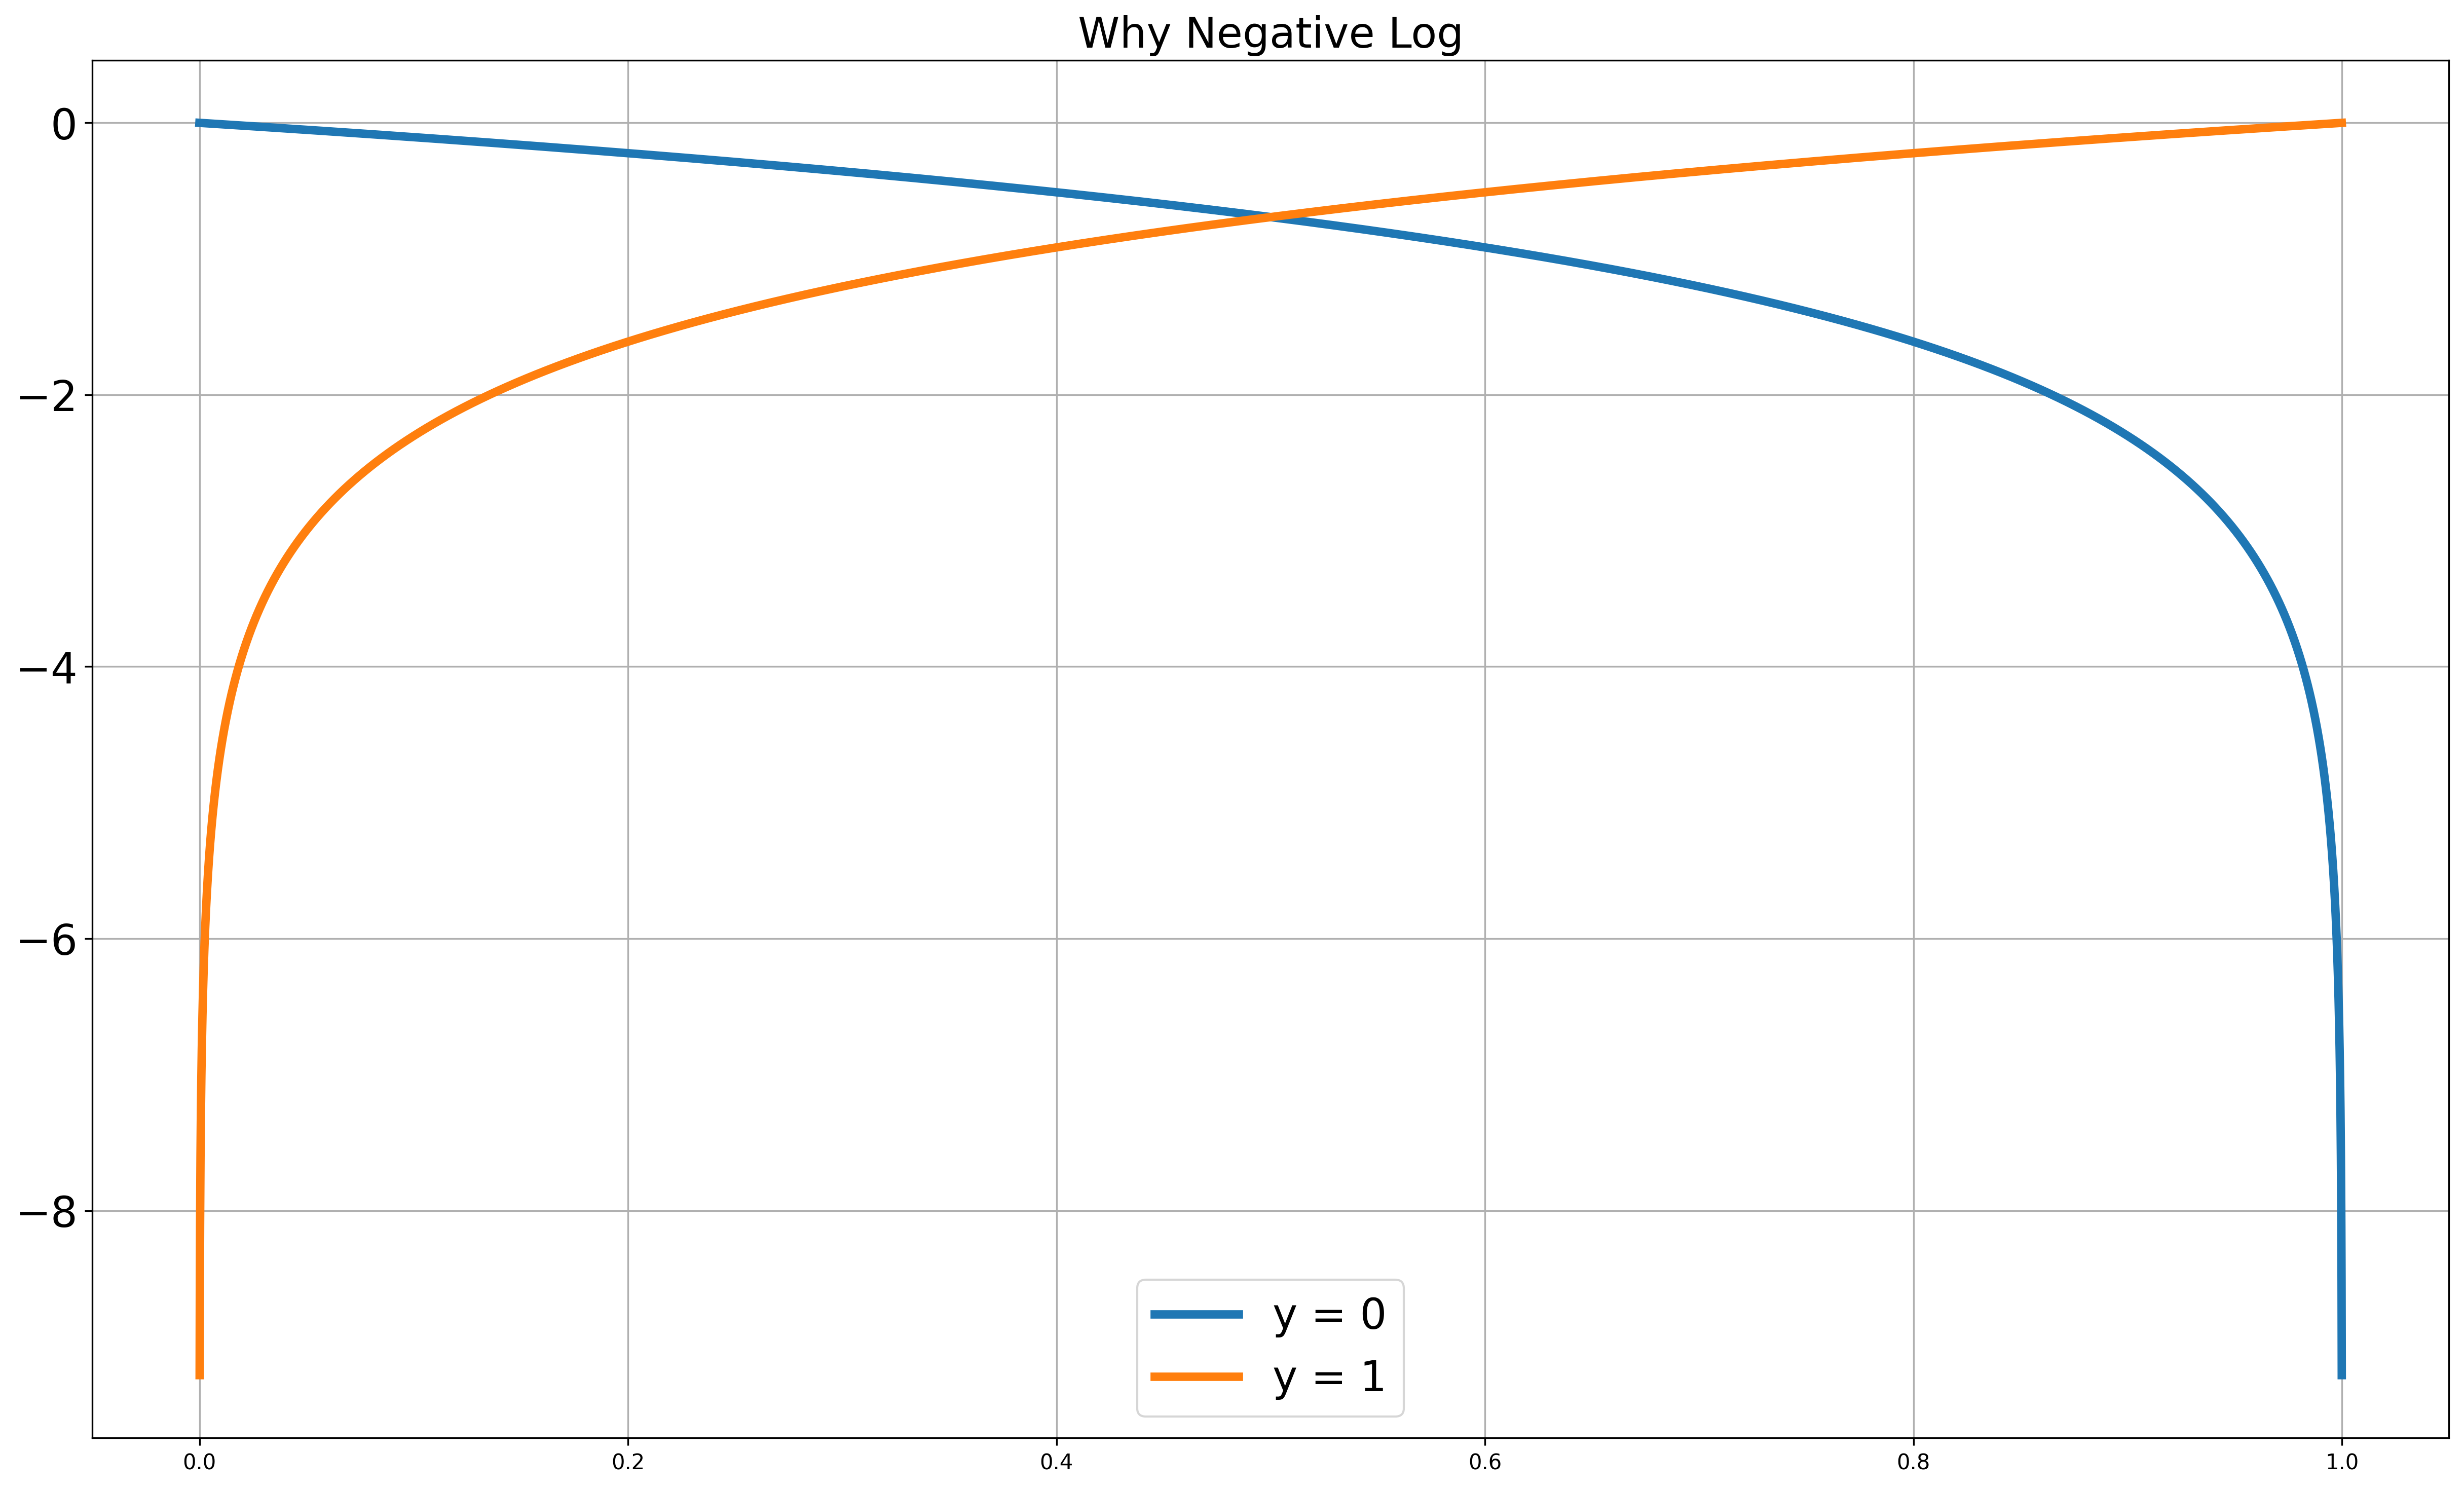

In [261]:
log_x = np.arange(0,1,0.0001)
fig = plt.figure(1,(20,12),dpi=300)
plt.plot(log_x,   np.log(1-log_x), label="y = 0",linewidth=4)
plt.plot(log_x,   np.log(log_x), label = "y = 1",linewidth=4)
plt.yticks(fontsize=20)
plt.title("Why Negative Log",fontsize=20)
plt.legend(prop={'size': 20})
plt.grid(True)
plt.savefig("Negative Log_1.png", dpi=300)


In [262]:
# Generate random data points (1-Dimensional)
x = np.arange(-100,100,0.1)
print(len(x))

# Construct a Linear Equation
m = 3
b = 1
randomness = [random.uniform(0,1) for x in range(len(x))]
# Sigmoid function with randomness
s_y = (1/(1+np.exp(-(m*x+b+randomness))))
s_y[s_y >= 0.5] = 1
s_y[s_y < 0.5] = 0

2000


In [263]:
def optimizer(m,b,independent,dependent,learning_rate):  
    
    y_true = dependent
    # calculate the predictions
    y_pred = (1/(1+(np.exp(-(independent*m+b)))))
    
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    
    # Get the loss 
    loss = binary_cross_entropy(y_true, y_pred)
    # Show it
    # print(f'Loss is {loss}')
    
    gradient_for_m=0
    gradient_for_b=0
    
    number_of_points = len(independent)
    
    for i in range(0,number_of_points):
        gradient_for_m+= (y_pred[i] - y_true[i]) * independent[i]
        gradient_for_b+= (y_pred[i] - y_true[i])
        
    m = m-((learning_rate*(gradient_for_m/number_of_points)))
    
    b = b-((learning_rate*(gradient_for_b/number_of_points)))
    
    return m,b,loss

In [268]:
number_of_epochs=300
learning_rate = 0.1
m,b=0,0
errors = []
for e in range(0,number_of_epochs):
    m,b,loss = optimizer(m,b,x,s_y,learning_rate)
    errors.append(loss)
print(f"Best possible m {m:.2f}")
print(f"Best possible b {b:.2f}")

Best possible m 2.49
Best possible b 0.02


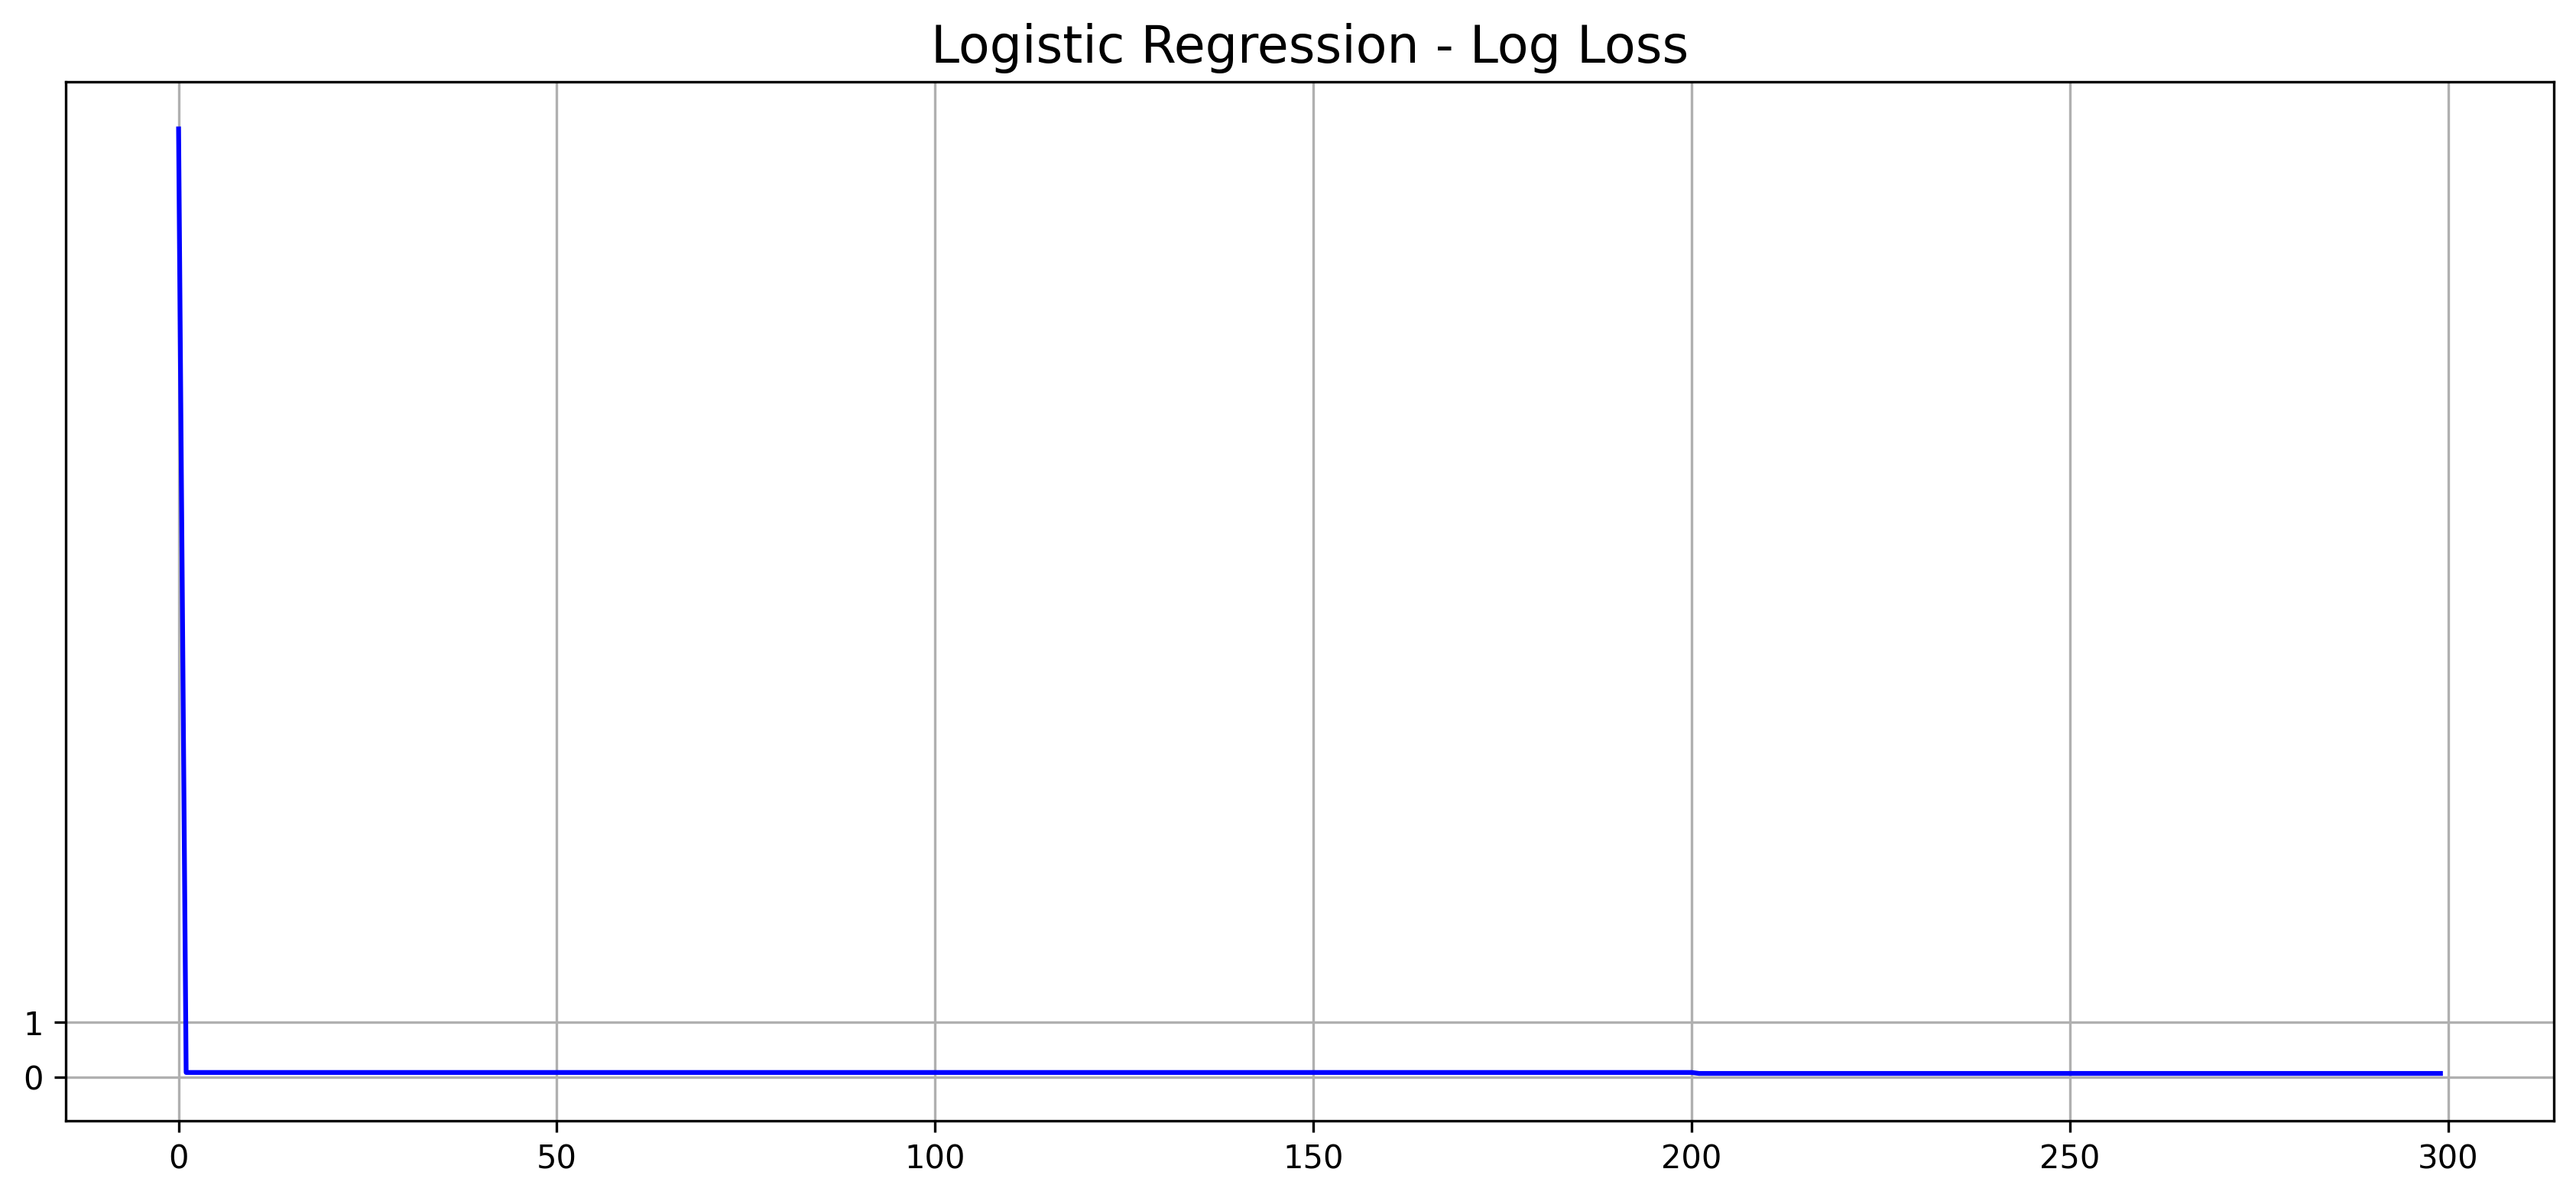

In [269]:
figure = plt.figure(1,(14,6),dpi=300)
plt.title("Logistic Regression - Log Loss",fontsize=16)
plt.yticks([0,1])
plt.xticks()
plt.plot(range(0,number_of_epochs,1),errors,color="blue")
plt.grid(True)
# plt.savefig("Logistic Regression Cutoff_Position_1.png", format="png", dpi=300)
plt.show()

In [270]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x.reshape(-1,1),s_y)
print(clf.coef_)
print(clf.intercept_)

[[2.23839816]]
[0.8078054]


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


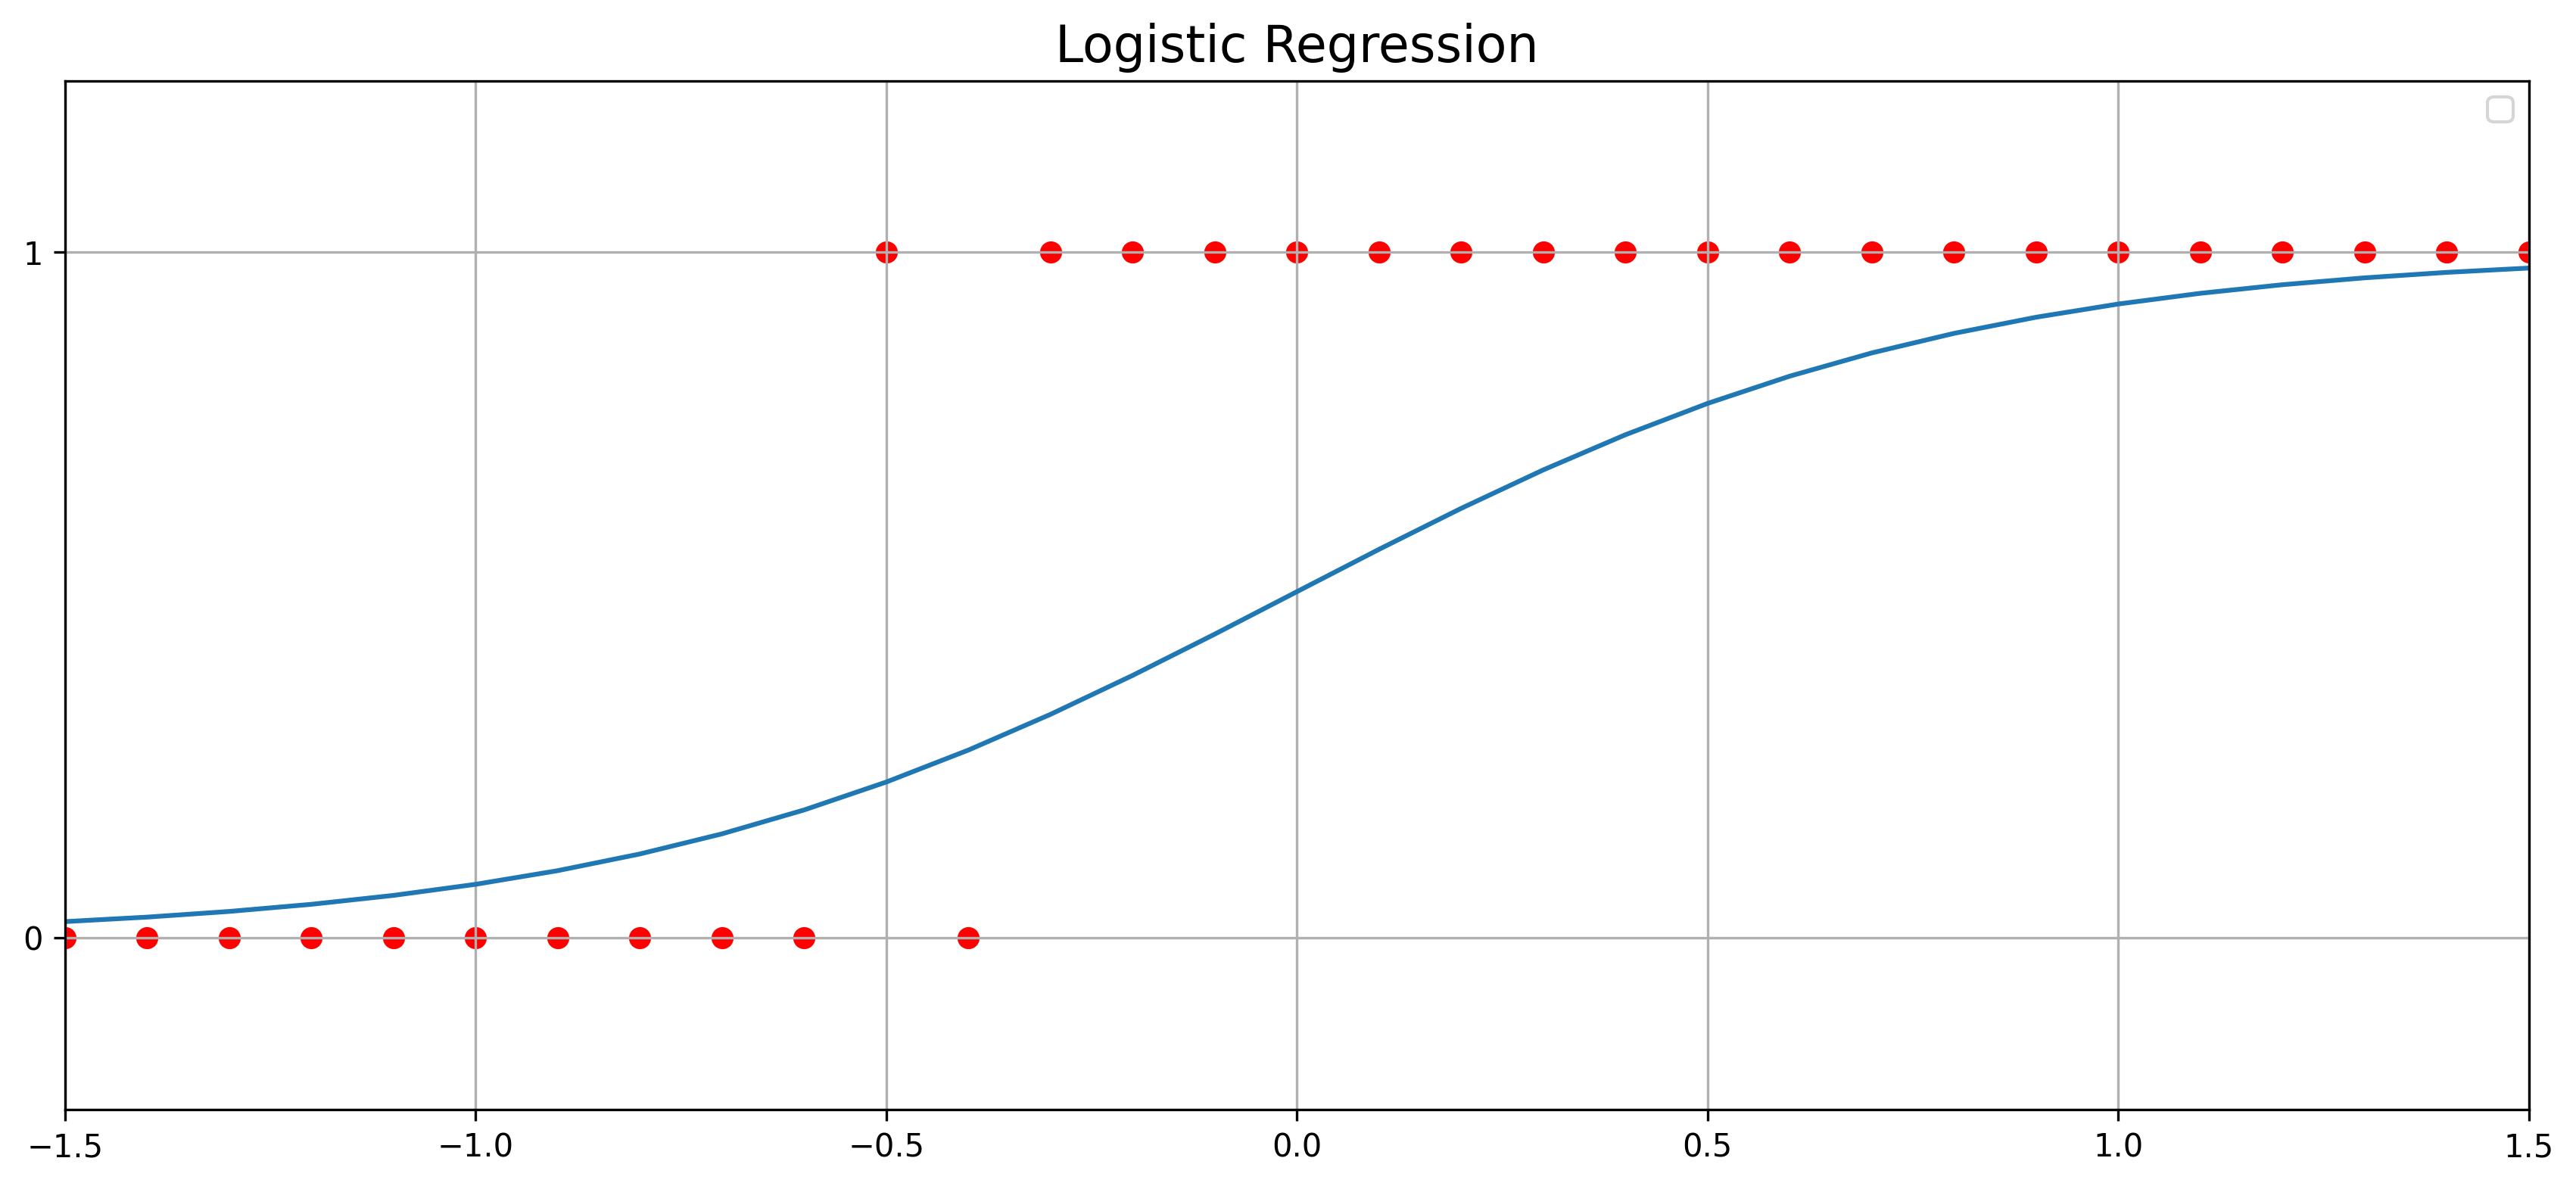

In [271]:
# Get best m and best b and calculate sigmoid graph
s_y_n = (1/(1+np.exp(-(m*x+b))))

figure = plt.figure(1,(14,6),dpi=300)
plt.title("Logistic Regression",fontsize=16)
plt.ylim(-0.25,1.25)
plt.xlim(-1.5,1.5)
plt.yticks([0,1])
plt.xticks()
plt.scatter(x,s_y,color="red")
plt.plot(x,s_y_n)
plt.grid(True)
plt.legend()
# plt.savefig("Logistic Regression Cutoff_Position_1.png", format="png", dpi=300)
plt.show()